# Лабораторна №6

Мета:
Розробка та тренування нейронної мережі для класифікації рукописних цифр набору даних MNIST.

Завдання:
Завантажте набір даних MNIST:

Використовуйте TensorFlow або інші джерела для отримання набору даних.
Підготуйте дані для тренування:

Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.
Створіть нейронну мережу:

Розробіть нейронну мережу з використанням повнозвязних шарів.
Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.
Тренуйте модель:

Навчіть модель на тренувальному наборі даних.
Експериментуйте з різними оптимізаторами та іншими гіперпараметрами.
Оцініть ефективність моделі:

Використовуйте тестувальний набір даних для оцінки точності моделі.
Візуалізуйте деякі результати класифікації.

## 1. Preparation

In [373]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [374]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check the shape of our data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [375]:
# Show the first training example
print(f"Training sample:\n{train_images[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

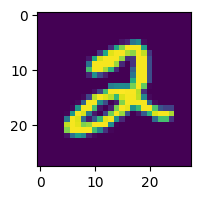

In [376]:
# Plot a single example
plt.figure(figsize=(2, 2))
plt.imshow(train_images[5])

In [377]:
# Check our samples label
train_labels[7]

3

In [378]:
# Check shape of a single example
train_images[0].shape, train_labels[0].shape

((28, 28), ())

In [379]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Four')

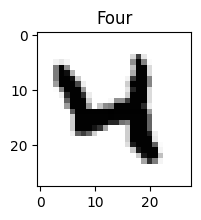

In [380]:
# Plot an example image and its label
plt.figure(figsize=(2, 2))
plt.imshow(train_images[20], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[20]])

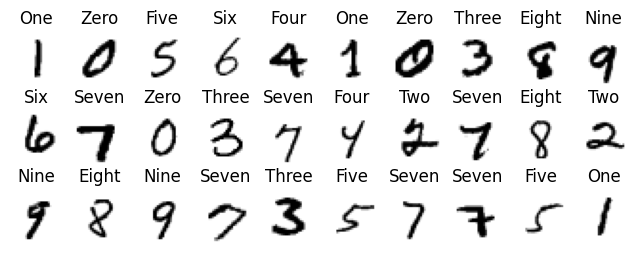

In [381]:
# Plot multiple random images of MNIST
import random
plt.figure(figsize=(8, 6))
for i in range(30):
  ax = plt.subplot(6, 10, i + 1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## 2. First model

In [382]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  # tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  # tf.keras.layers.Dense(4, activation="relu"),
  # tf.keras.layers.Dense(4, activation="relu"),
  # tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_images, train_labels, epochs=5, 
                               validation_data=(test_images, test_labels)) # see how the model performs on the test set during training

# Оцінка ефективності моделі на тестових даних
test_loss1, test_acc1 = model_1.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc1}')

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3056 - accuracy: 0.8462 - val_loss: 0.4784 - val_accuracy: 0.8930
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3604 - accuracy: 0.9121 - val_loss: 0.3794 - val_accuracy: 0.9127
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2715 - accuracy: 0.9313 - val_loss: 0.2641 - val_accuracy: 0.9342
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2494 - accuracy: 0.9362 - val_loss: 0.2754 - val_accuracy: 0.9324
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.9383
Test accuracy: 0.9383000135421753


In [383]:
# Check the shapes of our model
model_1.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_65 (Flatten)        (None, 784)               0         
                                                                 
 dense_153 (Dense)           (None, 128)               100480    
                                                                 
 dense_154 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [384]:
# Check the min and max values of the training data
train_images.min(), train_images.max()

(0, 255)

In [385]:
# Завантаження та підготовка даних
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [401]:
# Check the shape of our data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [386]:
# Check the min and max values of the training data
train_images.min(), train_images.max()

(0.0, 1.0)

## 3. Second model

In [387]:
# Check the min and max values of the training data
train_labels.min(), train_labels.max()

(0, 9)

In [388]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Створення нейронної мережі
model_2 = models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компіляція та тренування моделі
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

norm_history = model_2.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Оцінка ефективності моделі на тестових даних
test_loss2, test_acc2 = model_2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc2}')

# Візуалізація результатів класифікації для кількох зображень
predictions = model_2.predict(test_images)

Epoch 1/5


938/938 [==============================] - 4s 3ms/step - loss: 0.2996 - accuracy: 0.9154 - val_loss: 0.1614 - val_accuracy: 0.9521
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1366 - accuracy: 0.9608 - val_loss: 0.1115 - val_accuracy: 0.9658
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0938 - accuracy: 0.9728 - val_loss: 0.0942 - val_accuracy: 0.9718
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0709 - accuracy: 0.9789 - val_loss: 0.0812 - val_accuracy: 0.9741
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9734
Test accuracy: 0.9733999967575073
313/313 [==============================] - 1s 2ms/step


<Axes: title={'center': 'Normalized data'}>

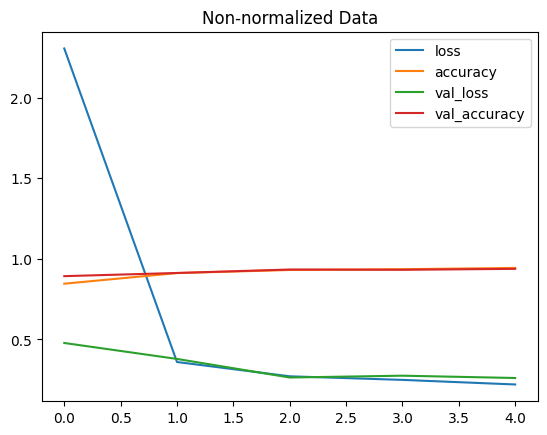

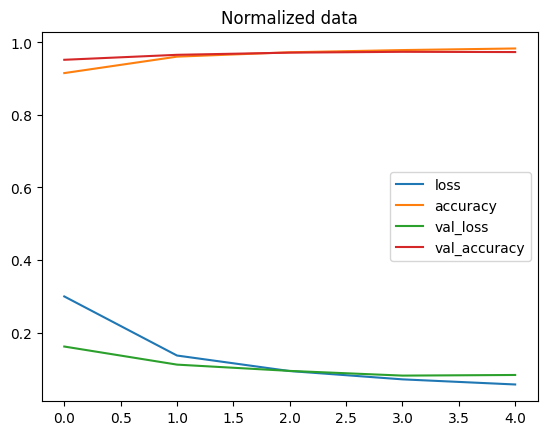

In [389]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## 4. Finding ideal learning Rate

In [390]:
# # Створення нейронної мережі
# model_3 = models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# # Компіляція та тренування моделі
# model_3.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Create the learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# # Fit the model
# find_lr_history = model_3.fit(train_images,
#                                train_labels,
#                                epochs=5,
#                                batch_size=64,
#                                validation_data=(test_images, test_labels),
#                                callbacks=[lr_scheduler])

# # Оцінка ефективності моделі на тестових даних
# test_loss, test_acc = model_2.evaluate(test_images, test_labels)
# print(f'Test accuracy: {test_acc}')

In [391]:
# # Plot the learning rate decay curve
# lrs = 1e-3 * (10**(np.arange(5)/20))
# plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
# plt.xlabel("Learning rate")
# plt.ylabel("Loss")
# plt.title("Finding the ideal learning rate")
# # we'll take 0.001 as ideal

## 5. Third model (finding best params)

In [392]:
# Створення нейронної мережі
model_4 = models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_4 = model_4.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Оцінка ефективності моделі на тестових даних
test_loss4, test_acc4 = model_4.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc4}')

# Візуалізація результатів класифікації для кількох зображень
predictions = model_4.predict(test_images)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2604 - accuracy: 0.9250 - val_loss: 0.1262 - val_accuracy: 0.9616
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1058 - accuracy: 0.9679 - val_loss: 0.0943 - val_accuracy: 0.9711
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.0766 - val_accuracy: 0.9761
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0806 - val_accuracy: 0.9766
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0748 - val_accuracy: 0.9802
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 

<Axes: title={'center': '3rd model history'}>

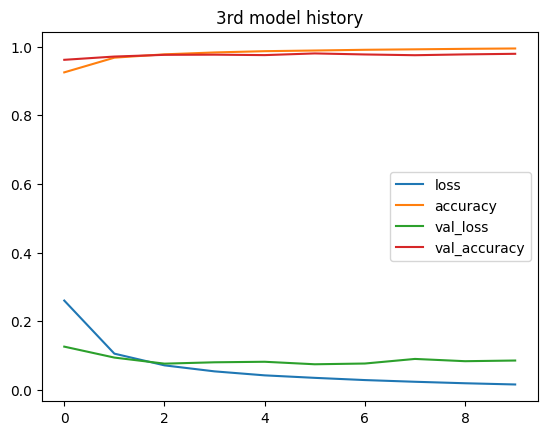

In [393]:
pd.DataFrame(history_4.history).plot(title="3rd model history")

In [394]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [395]:
test_labels[1]
rounded_labels=np.argmax(test_labels, axis=1)
rounded_labels[1]

2

In [396]:
predictions[1]
rounded_pred=np.argmax(predictions, axis=1)
rounded_pred[1]

2

In [397]:
# See the predicted class number and label for the first example
predictions[0].argmax(), class_names[predictions[0].argmax()]

(7, 'Seven')

In [398]:
# Convert all of the predictions from probabilities to labels
y_preds = predictions.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

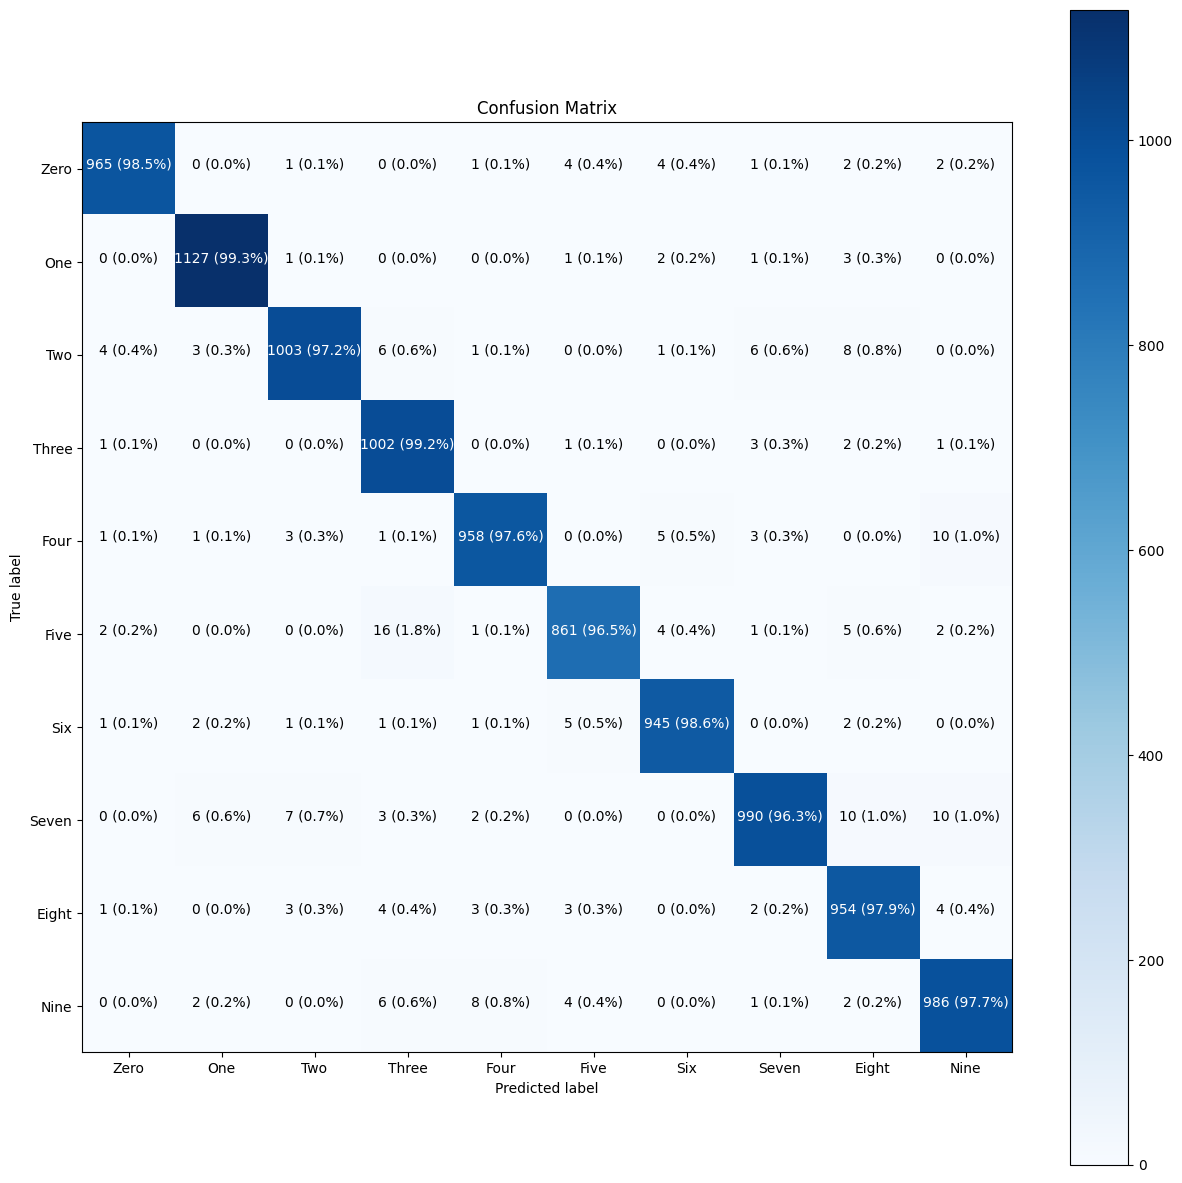

In [399]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=rounded_labels,
                      y_pred=rounded_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [400]:
model_results = [["model_1", test_loss1, test_acc1],
                 ["model_2", test_loss2, test_acc2],
                 ["model_3", test_loss4, test_acc4]]

all_results = pd.DataFrame(model_results, columns=["model", "test_loss", "test_accuracy"])
all_results

,model,test_loss,test_accuracy
0,model_1,0.261095,0.9383
1,model_2,0.082983,0.9734
2,model_3,0.085742,0.9791
